# Explore here

We are going to focus on Lake_Bilancino for this exercise. Do and EDA and Build a Model.

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load Lake Bilancino dataset
df = pd.read_csv('/workspaces/Time-Series-Marcel/data/acea-water-prediction/Lake_Bilancino.csv')

# Display the first few rows of the dataset
df.head()

,Date,Rainfall_S_Piero,Rainfall_Mangona,Rainfall_S_Agata,Rainfall_Cavallina,Rainfall_Le_Croci,Temperature_Le_Croci,Lake_Level,Flow_Rate
0,03/06/2002,NaN,NaN,NaN,NaN,NaN,NaN,249.43,0.31
1,04/06/2002,NaN,NaN,NaN,NaN,NaN,NaN,249.43,0.31
2,05/06/2002,NaN,NaN,NaN,NaN,NaN,NaN,249.43,0.31
3,06/06/2002,NaN,NaN,NaN,NaN,NaN,NaN,249.43,0.31
4,07/06/2002,NaN,NaN,NaN,NaN,NaN,NaN,249.44,0.31


In [35]:
# Drop not useful columns
df_Bilancino = df.drop(['Rainfall_S_Piero', 'Rainfall_Mangona', 'Rainfall_S_Agata', 'Rainfall_Cavallina', 'Rainfall_Le_Croci', 'Temperature_Le_Croci'], axis=1)

df_Bilancino.head()

,Date,Lake_Level,Flow_Rate
0,03/06/2002,249.43,0.31
1,04/06/2002,249.43,0.31
2,05/06/2002,249.43,0.31
3,06/06/2002,249.43,0.31
4,07/06/2002,249.44,0.31


In [36]:
# Check for missing values
print(df_Bilancino.isnull().sum())

Date           0
Lake_Level     0
Flow_Rate     21
dtype: int64


In [37]:
# Convert the 'date' column to datetime format
df_Bilancino['Date'] = pd.to_datetime(df_Bilancino['Date'], format='%d/%m/%Y')

In [38]:
# Extract the year and create a new 'year' column
df_Bilancino['Year'] = df_Bilancino['Date'].dt.year

In [39]:
# Group by the 'Year' column and count null values for each column
null_counts_per_year = df_Bilancino.groupby('Year').apply(lambda x: x.isnull().sum())

# Display the result
print(null_counts_per_year)

      Date  Lake_Level  Flow_Rate  Year
Year                                   
2002     0           0         16     0
2003     0           0          5     0
2004     0           0          0     0
2005     0           0          0     0
2006     0           0          0     0
2007     0           0          0     0
2008     0           0          0     0
2009     0           0          0     0
2010     0           0          0     0
2011     0           0          0     0
2012     0           0          0     0
2013     0           0          0     0
2014     0           0          0     0
2015     0           0          0     0
2016     0           0          0     0
2017     0           0          0     0
2018     0           0          0     0
2019     0           0          0     0
2020     0           0          0     0


/tmp/ipykernel_6820/616062419.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  null_counts_per_year = df_Bilancino.groupby('Year').apply(lambda x: x.isnull().sum())


All Null values are found from the years 2002 & 2003. Therefore we will drop those rows and focus on the more accurate data from 2004 onwards.

In [40]:
# Filter the DataFrame to keep only years >= 2004
df_Bilancino = df_Bilancino[df_Bilancino['Year'] > 2003]
# Drop the 'Year' column as it is no longer needed
df_Bilancino = df_Bilancino.drop('Year', axis=1)

df_Bilancino.head()

,Date,Lake_Level,Flow_Rate
577,2004-01-01,251.14,0.5
578,2004-01-02,251.21,0.5
579,2004-01-03,251.28,0.5
580,2004-01-04,251.35,0.5
581,2004-01-05,251.37,0.5


Visualitzation of Lake Data

/tmp/ipykernel_6820/3886927952.py:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  sns.lineplot(x=df_Bilancino['Date'], y=df_Bilancino['Lake_Level'].fillna(method='ffill'), ax=ax, color='dodgerblue')


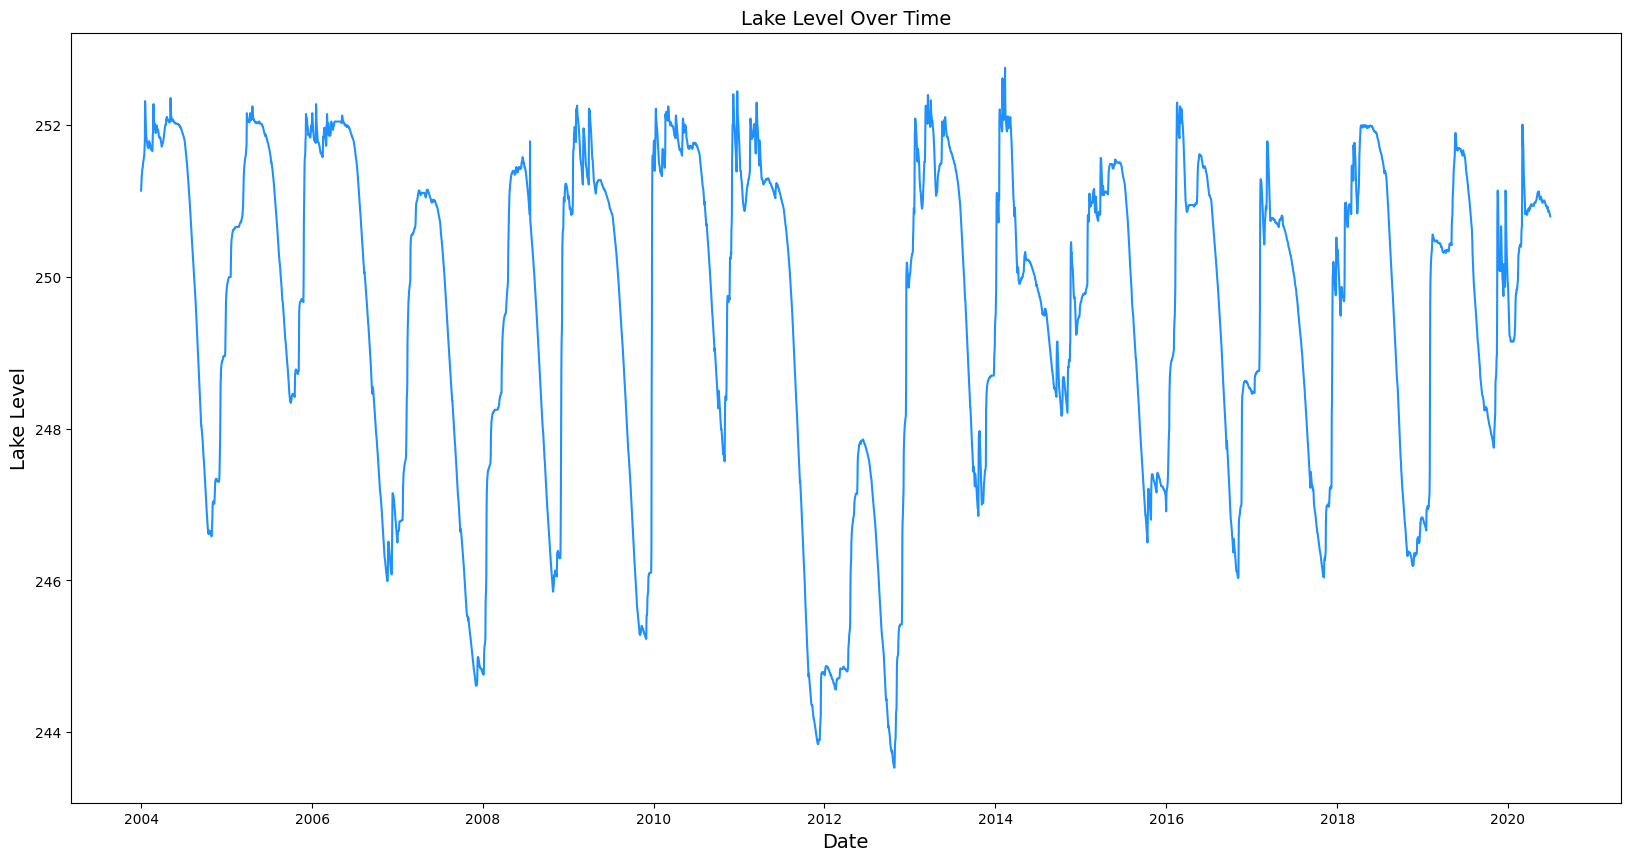

/tmp/ipykernel_6820/3886927952.py:14: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  sns.lineplot(x=df_Bilancino['Date'], y=df_Bilancino['Flow_Rate'].fillna(method='ffill'), ax=ax, color='dodgerblue')


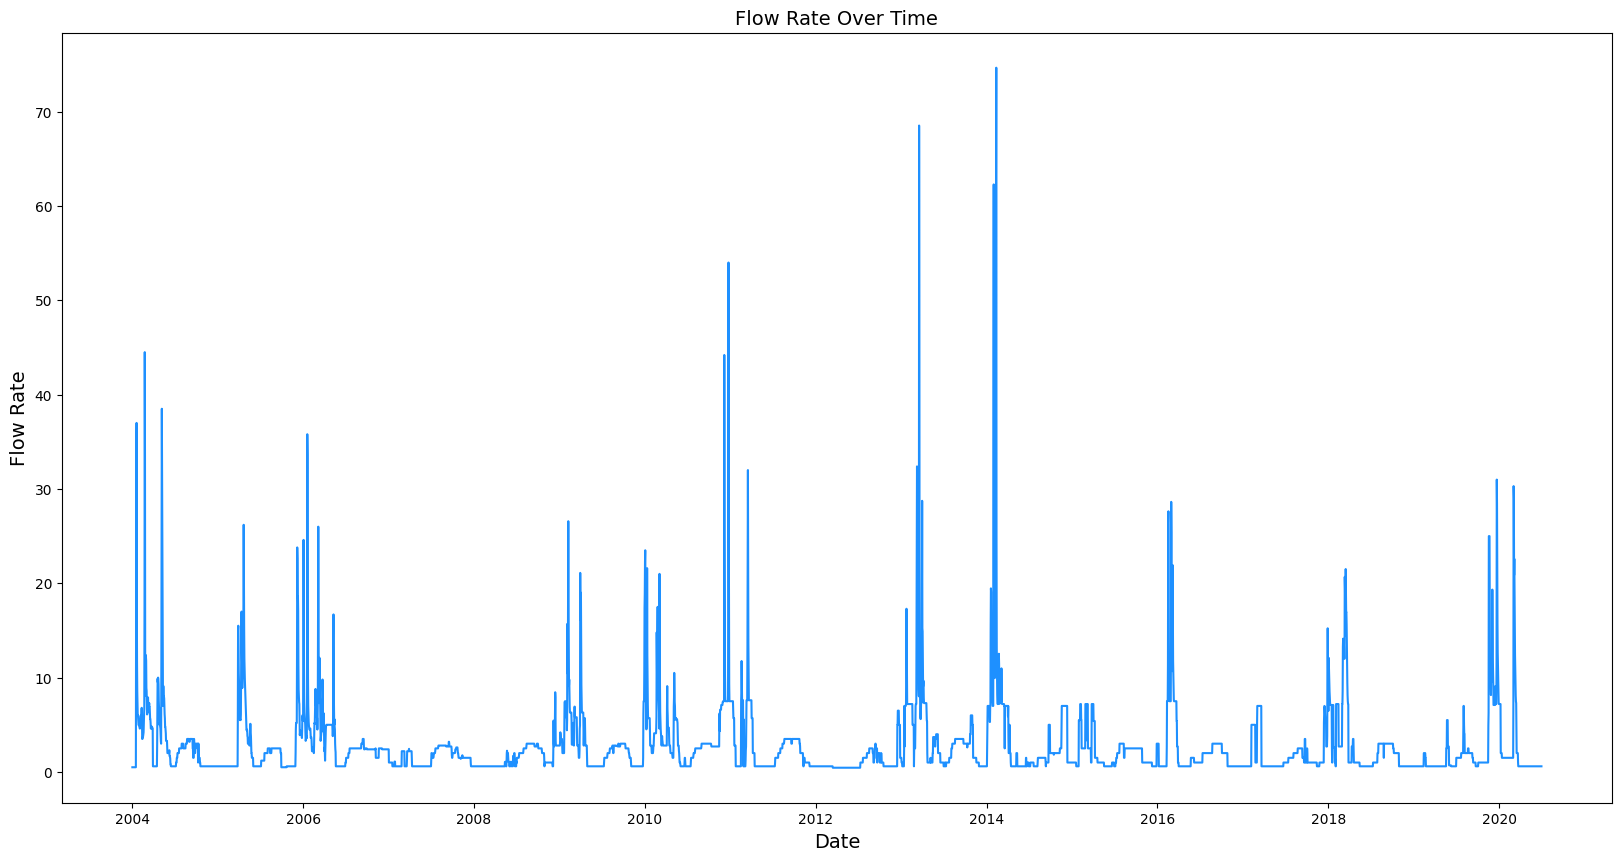

In [50]:
# Plotting Lake Level
f, ax = plt.subplots(figsize=(20, 10))

sns.lineplot(x=df_Bilancino['Date'], y=df_Bilancino['Lake_Level'].fillna(method='ffill'), ax=ax, color='dodgerblue')
ax.set_title('Lake Level Over Time', fontsize=14)
ax.set_ylabel('Lake Level', fontsize=14)
ax.set_xlabel('Date', fontsize=14)

plt.show()

# Plotting Flow Rate
f, ax = plt.subplots(figsize=(20, 10))

sns.lineplot(x=df_Bilancino['Date'], y=df_Bilancino['Flow_Rate'].fillna(method='ffill'), ax=ax, color='dodgerblue')
ax.set_title('Flow Rate Over Time', fontsize=14)
ax.set_ylabel('Flow Rate', fontsize=14)
ax.set_xlabel('Date', fontsize=14)

plt.show()